In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import json
import requests
import datetime as dt

In [3]:
# Import ems data from csv
ems_df = pd.read_csv("EMS_DATA.csv")
ems_df = ems_df.rename(columns={"GROUP_DATE":"Date"})
ems_df.head()

,Date,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE
0,01/01/2016,4879,4.139373
1,01/01/2017,4928,4.196226
2,01/01/2018,4653,4.137975
3,01/02/2016,3439,4.165455
4,01/02/2017,3685,4.181818


In [4]:
# Import moon data from csv
moon_df = pd.read_csv("Moon_Data.csv")
del moon_df["Unnamed: 0"]
moon_df.head()

,Date,Phase
0,1/2/2016,Last Quarter
1,1/10/2016,New Moon
2,1/16/2016,First Quarter
3,1/24/2016,Full Moon
4,2/1/2016,Last Quarter


In [5]:
# Change the date to a datetime object
moon_df['DATETIME']= pd.to_datetime(moon_df['Date'])
moon_df= moon_df.astype({'DATETIME': 'datetime64'})
moon_df['GROUP_DATE']= moon_df['DATETIME'].dt.strftime("%Y/%m/%d")
moon_df.head()

,Date,Phase,DATETIME,GROUP_DATE
0,1/2/2016,Last Quarter,2016-01-02,2016/01/02
1,1/10/2016,New Moon,2016-01-10,2016/01/10
2,1/16/2016,First Quarter,2016-01-16,2016/01/16
3,1/24/2016,Full Moon,2016-01-24,2016/01/24
4,2/1/2016,Last Quarter,2016-02-01,2016/02/01


In [6]:
# Merge tables
darkside = pd.merge(ems_df, moon_df, on="Date", how="left")

#Clean up table
darkside = darkside.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"Initial Severity Level Code", "INCIDENT_DATETIME":"Incident Count", "Phase": "Moon Phase"})
darkside

,Date,Incident Count,Initial Severity Level Code,Moon Phase,DATETIME,GROUP_DATE
0,01/01/2016,4879,4.139373,NaN,NaT,NaN
1,01/01/2017,4928,4.196226,NaN,NaT,NaN
2,01/01/2018,4653,4.137975,NaN,NaT,NaN
3,01/02/2016,3439,4.165455,NaN,NaT,NaN
4,01/02/2017,3685,4.181818,NaN,NaT,NaN
5,01/02/2018,4242,4.166667,NaN,NaT,NaN
6,01/03/2016,3433,4.230702,NaN,NaT,NaN
7,01/03/2017,4302,4.205486,NaN,NaT,NaN
8,01/03/2018,4602,4.228162,NaN,NaT,NaN
9,01/04/2016,3707,4.241705,NaN,NaT,NaN


In [7]:
#creating a statistics overview of dataframe before plotting 
darkside.describe()

,Incident Count,Initial Severity Level Code
count,1096.000000,1096.000000
mean,4056.227190,4.257345
std,282.974114,0.053707
min,3180.000000,4.079378
25%,3874.000000,4.220619
50%,4048.000000,4.256514
75%,4247.750000,4.295676
max,4981.000000,4.417154


In [8]:
#creating a new df
df = darkside[["Date", "Incident Count", "Moon Phase"]]
df.head()

,Date,Incident Count,Moon Phase
0,01/01/2016,4879,NaN
1,01/01/2017,4928,NaN
2,01/01/2018,4653,NaN
3,01/02/2016,3439,NaN
4,01/02/2017,3685,NaN


In [9]:
year_df = pd.DatetimeIndex(df['Date']).year
year_df

Int64Index([2016, 2017, 2018, 2016, 2017, 2018, 2016, 2017, 2018, 2016,
            ...
            2018, 2016, 2017, 2018, 2016, 2017, 2018, 2016, 2017, 2018],
           dtype='int64', name='Date', length=1096)

In [10]:
df['Year'] = year_df
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Incident Count,Moon Phase,Year
0,01/01/2016,4879,NaN,2016
1,01/01/2017,4928,NaN,2017
2,01/01/2018,4653,NaN,2018
3,01/02/2016,3439,NaN,2016
4,01/02/2017,3685,NaN,2017


In [12]:
#does year equals to 2016?
#is 2016 a boolean variable with True or False
is_2016=df['Year']==2016
print(is_2016.head())

0     True
1    False
2    False
3     True
4    False
Name: Year, dtype: bool


In [13]:
#filter row for year 2016 using boolean variable
df_2016=df[is_2016]

# .shape gives us the dimensionality of the df (i.e, 366 rows and 4 columns)
print(df_2016.shape)


(366, 4)


In [14]:
print(df_2016.head())

          Date  Incident Count Moon Phase  Year
0   01/01/2016            4879        NaN  2016
3   01/02/2016            3439        NaN  2016
6   01/03/2016            3433        NaN  2016
9   01/04/2016            3707        NaN  2016
12  01/05/2016            3614        NaN  2016


In [15]:
updated_df = df_2016.drop("Date", axis=1)
updated_df.head()

,Incident Count,Moon Phase,Year
0,4879,NaN,2016
3,3439,NaN,2016
6,3433,NaN,2016
9,3707,NaN,2016
12,3614,NaN,2016


<IPython.core.display.Javascript object>


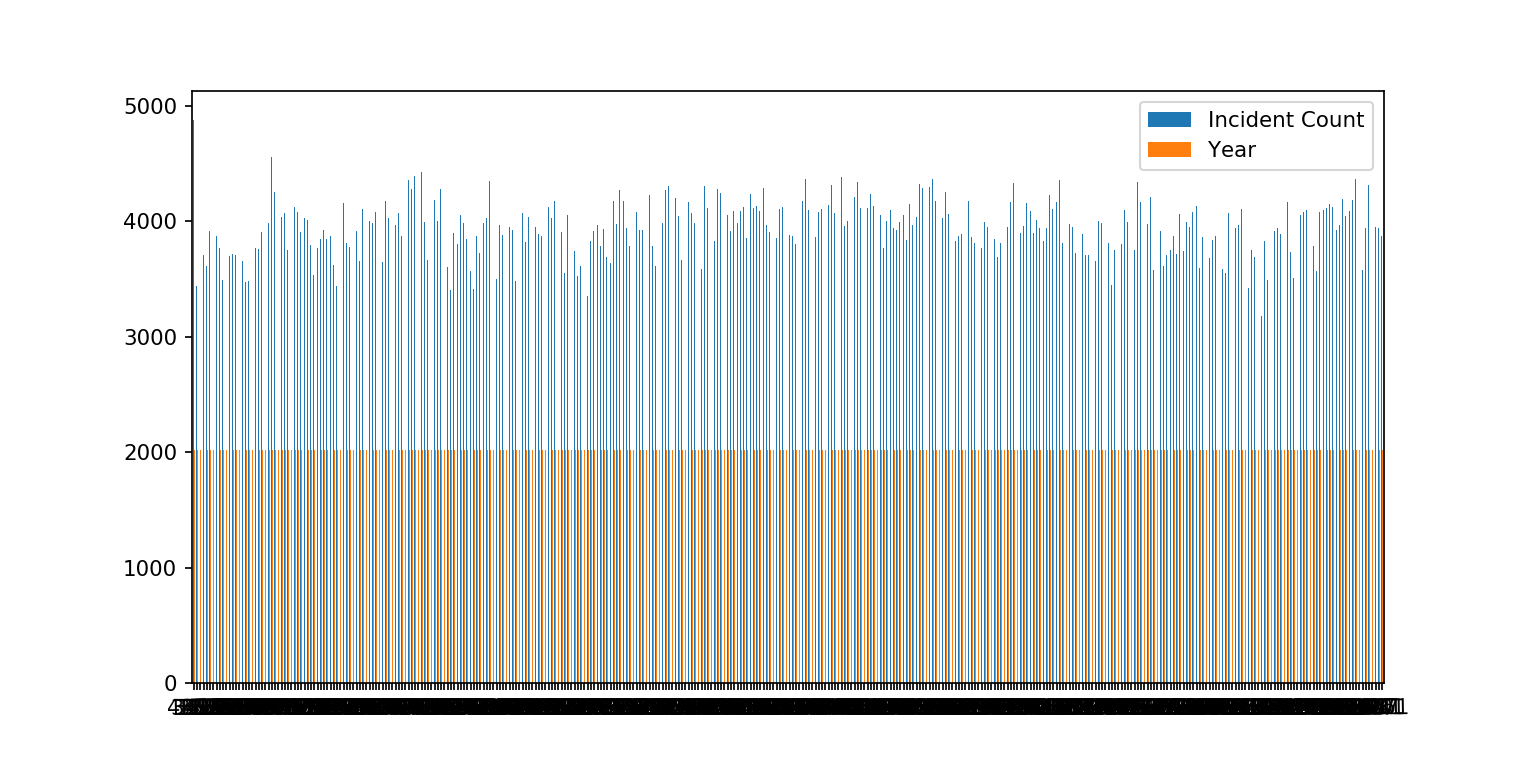

In [16]:
#creating bar diagram using multiple columns 
multi_plot = updated_df.plot(kind="bar", figsize=(10,5))

multi_plot.set_xticklabels(updated_df["Incident Count"], rotation=1)

plt.show()

#plt.tight_layout()

#plt.savefig(.png)


In [ ]:
#average = df['Incident Count'].mean()
#average

In [ ]:
#total incident by moon phases
#phase_percent = df.groupby(["Moon Phase"]).sum()["Incident Count"] / df["Incident Count"].sum() * 100
#phase_percent

In [ ]:
#plt.pie(phase_percent,
#       labels=["First Quarter", "Full Moon", "Last Quarter", "New Moon"],
#        colors=["yellow", "orange", "red", "lightcoral"],
#        explode=[0, 0, 0, 0],
 #       autopct="%1.1f%%",
  #      shadow=True,
   #     startangle=140)

#plt.title("Total Incident by different phases of Moon")

#plt.axis("equal")

#plt.show()

#plt.savefig(".png")

In [ ]:
#looking for the New Moon
#new_moon =  df.loc[ df['Moon Phase'] == "Full Moon", :]
#new_moon
#new_moon.count()

In [ ]:
#labels=["First Quarter", "Full Moon", "Last Quarter", "New Moon"]
#sizes=[215, 130, 245, 210]
#colors=["gold", "yellowgreen", "lightcoral", "lightskyblue"]
#explode=(0.1, 0, 0, 0)

#plot
3#plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
#autopct="%1.1f%%", shadow=True, startangle=140)
#
#plt.axis("equal")

#plt.show()


In [ ]:
#updated_df=pd.DataFrame({"phases": ["New Moon", "First Quarter", "New Moon", "Last Quarter"],
 #                       "year": })

In [ ]:
#percent_year = incident_years.groupby(["Years"]).sum()["Incident Count"] / incident_years['Incident Count'].sum() * 100


In [ ]:
#plt.pie(percent_year,
#        labels = [2016, 2017, 2018],
#        colors = ["red", "blue", "yellow"],
#        explode = [0, 0.1, 0.1],
#        autopct = "%1.1f%%",
#        shadow = True,
#        startangle=130)

#plt.axis("equal")

#plt.show()

In [ ]:
#creating a pie chart based upon the year
#plt.pie(
###    incident_years['Years'],
#    labels=incident_years['Moon Phase'],
 #   shadow=True,
  #  colors=['red', 'yellow', 'orange'],
   # explode=(0.1, 0.1, 0.1),
    #startangle=160,
    #autopct='%1.1f%%'   
#)

In [ ]:
#Initial severity level code=code on a scale of 1-8 depending on the level of severity 
# calculating the incident count
#incident_count=darkside['Incident Count'].count()


In [ ]:
#incident count by years
#  = 

In [ ]:
#phase_unique.value_counts()

In [ ]:
# calculating the number of incident by different phases of moon



In [ ]:
#looking for the New Moon
#new_moon = darkside.loc[darkside['Phase'] == "Full Moon", :]
#new_moon
#new_moon.count()

In [ ]:
#percent = darkside.groupby(["Incident Count"]).sum()["Phase"] / darkside["Phase"].sum() * 100

# Pie chart on number of Incident based upon the different phases of moon

#labels = ["New Moon", "First Quarter", "Full Moon", "Last Quarter"]
#sizes = [200, 90, 85, 100]
##colors = ["red", "blue", "yellow", "gray"]
#explode = (0.1, 0.1, 0.1, 0.1)
#plt.pie(percent,
#        labels = ["New Moon", "First Quarter", "Full Moon", "Last Quarter"],
#        colors = ["red", "blue", "yellow", "gray"],
#        explode = [0.1, 0.1, 0.1, 0.1],
#        autopct = "%1.1f%%",
#        shadow = True,
##        startangle = 160)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#plt.title("Phases of Moon")

#plt.axis("equal")

# saving the image
#plt.savefig("../../../../phases of moon.png")

#plt.show()